In [1]:
import networkx as nx #Importation du module d'analyse 
import matplotlib.pyplot as plt
import pandas as pd 
import collections
import seaborn as sns
import numpy as np
from itertools import combinations
from itertools import chain

In [2]:
G= nx.read_edgelist('Dictionnaire_liens.csv',create_using=nx.Graph(),comments="node", delimiter=',') #Importation des données
Gd= nx.read_edgelist('Dictionnaire_liens.csv',create_using=nx.DiGraph(),comments="node", delimiter=',') #Importation des données

In [3]:
print(nx.info(G)) #Caractéristiques générales du graph 
print(nx.is_connected(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 46
Average degree:   2.8750
True


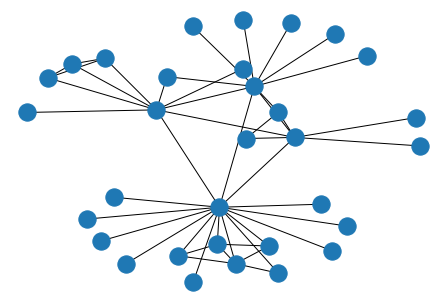

In [4]:
#Visualisation du réseaux
# /!\ : Ne pas utiliser si le nombre de lien est très important 
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")
nx.draw(H)
plt.show()

In [92]:
Deg= sorted(G.degree, key=lambda x: x[1], reverse=True)
print(Deg)
print("")
dc=nx.degree_centrality(G) 
print(sorted(dc.items(),key=lambda x:x[1],reverse=True))
#Identification des noeuds centraux 

[('Lucile Gi', 16), ('Dann Me', 10), ('Xi YU', 9), ('Antoine Ho', 7), ('Wilson Ra', 5), ('Lucile Gi AF22', 4), ('Jing Li', 3), ('Marie Ro', 3), ('Xi YU AF', 3), ('Xi YU AF2', 3), ('Lucile Gi AF', 3), ('Lucile Gi AF2', 3), ('Daphné Ch', 2), ('Antoine Ho AH', 2), ('Lucile Gi AH', 2), ('Paloma Lo', 1), ('LoÏc De', 1), ('Mylène Pa', 1), ('Lorenn Co', 1), ('Yamina Te', 1), ('Julie Be', 1), ('Raphael Pr', 1), ('Loic De', 1), ('Daphne Ch', 1), ('Michael Me', 1), ('Sana Ho', 1), ('Eda Er', 1), ('Lara Eu', 1), ('Zoé Ja', 1), ('Clara De', 1), ('Elise An', 1), ('Mathieu Ma', 1)]

[('Lucile Gi', 0.5161290322580645), ('Dann Me', 0.3225806451612903), ('Xi YU', 0.29032258064516125), ('Antoine Ho', 0.22580645161290322), ('Wilson Ra', 0.16129032258064516), ('Lucile Gi AF22', 0.12903225806451613), ('Jing Li', 0.0967741935483871), ('Marie Ro', 0.0967741935483871), ('Xi YU AF', 0.0967741935483871), ('Xi YU AF2', 0.0967741935483871), ('Lucile Gi AF', 0.0967741935483871), ('Lucile Gi AF2', 0.096774193548387

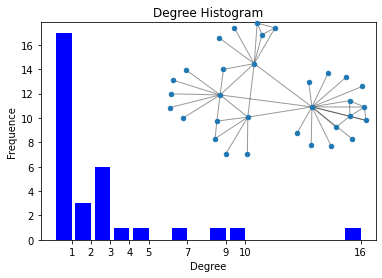

In [6]:
#Histogramme de la repartition des degrés 

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Frequence")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

In [7]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq


Text(0, 0.5, 'Frequence')

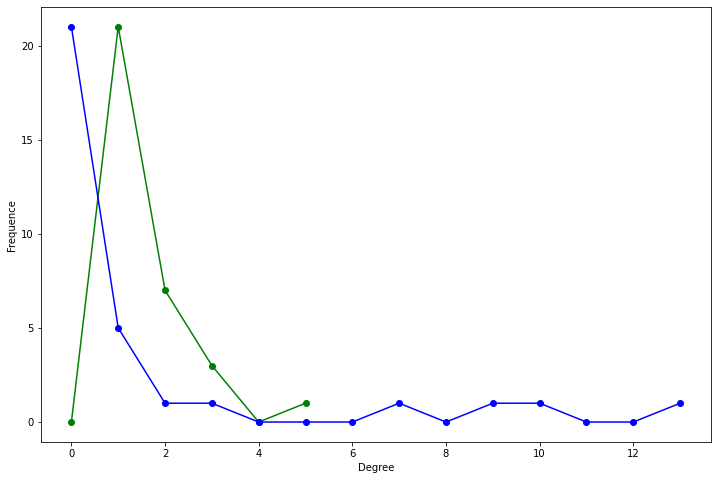

In [8]:
#Repartition des degré sortant et entrant 

in_degree_freq = degree_histogram_directed(Gd, in_degree=True)
out_degree_freq = degree_histogram_directed(Gd, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') #Possibilité de passage à l'échelle log pour des réseaux de grande taille (plt.loglog)
plt.plot(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequence')

In [9]:
df=pd.read_excel('Dictionnaire_attribut_sexe.xlsx',header='infer', index_col=0)
listsexe=df.to_dict()
l = list(listsexe.values())
result = {}
for d in l:
    result.update(d)
result

{'Paloma Lo': 'Femme',
 'Jing Li': 'Femme',
 'Lucile Gi': 'Femme',
 'Antoine Ho': 'Homme',
 'Dann Me': 'Homme',
 'Daphné Ch': 'Femme',
 'LoÏc De': 'Homme',
 'Mylène Pa': 'Femme',
 'Xi YU': 'Femme',
 'Lorenn Co': 'Femme',
 'Marie Ro': 'Femme',
 'Yamina Te': 'Femme',
 'Julie Be': 'Femme',
 'Raphael Pr': 'Homme',
 'Loic De': 'Homme',
 'Daphne Ch': 'Femme',
 'Michael Me': 'Homme',
 'Sana Ho': 'Femme',
 'Eda Er': 'Femme',
 'Lara Eu': 'Femme',
 'Zoé Ja': 'Femme',
 'Clara De': 'Femme',
 'Elise An': 'Femme',
 'Mathieu Ma': 'Homme',
 'Wilson Ra': 'Homme',
 'Antoine Ho AH': 'Homme',
 'Lucile Gi AH': 'Homme',
 'Xi YU AF': 'Femme',
 'Xi YU AF2': 'Femme',
 'Lucile Gi AF': 'Femme',
 'Lucile Gi AF2': 'Femme',
 'Lucile Gi AF22': 'Femme'}

In [10]:
#Ajout des attributs des noeuds (Homme/Femme) ==> Possibilité de constituer d'autres attributs via les réponses au questionnaire (CSP, Âge)
nx.set_node_attributes(Gd, result, 'Sexe')
nx.set_node_attributes(G,result, 'Sexe')

In [11]:
print(G.nodes(data=True)) #Noeud + Attribut sexe
print(nx.is_connected(G))

[('Xi YU', {'Sexe': 'Femme'}), ('Paloma Lo', {'Sexe': 'Femme'}), ('Jing Li', {'Sexe': 'Femme'}), ('Lucile Gi', {'Sexe': 'Femme'}), ('Antoine Ho', {'Sexe': 'Homme'}), ('Dann Me', {'Sexe': 'Homme'}), ('Daphné Ch', {'Sexe': 'Femme'}), ('LoÏc De', {'Sexe': 'Homme'}), ('Mylène Pa', {'Sexe': 'Femme'}), ('Lorenn Co', {'Sexe': 'Femme'}), ('Marie Ro', {'Sexe': 'Femme'}), ('Yamina Te', {'Sexe': 'Femme'}), ('Julie Be', {'Sexe': 'Femme'}), ('Raphael Pr', {'Sexe': 'Homme'}), ('Loic De', {'Sexe': 'Homme'}), ('Daphne Ch', {'Sexe': 'Femme'}), ('Michael Me', {'Sexe': 'Homme'}), ('Sana Ho', {'Sexe': 'Femme'}), ('Eda Er', {'Sexe': 'Femme'}), ('Lara Eu', {'Sexe': 'Femme'}), ('Zoé Ja', {'Sexe': 'Femme'}), ('Clara De', {'Sexe': 'Femme'}), ('Elise An', {'Sexe': 'Femme'}), ('Mathieu Ma', {'Sexe': 'Homme'}), ('Wilson Ra', {'Sexe': 'Homme'}), ('Xi YU AF', {'Sexe': 'Femme'}), ('Xi YU AF2', {'Sexe': 'Femme'}), ('Lucile Gi AF', {'Sexe': 'Femme'}), ('Lucile Gi AF2', {'Sexe': 'Femme'}), ('Lucile Gi AF22', {'Sexe': '

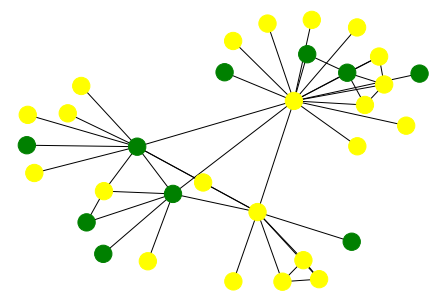

In [12]:
color_map = []
for node, data in G.nodes(data=True):
    if data['Sexe'] == 'Femme':
        color_map.append("Yellow")
    elif data['Sexe'] == 'Homme':
        color_map.append("Green")
        
pos=nx.spring_layout(G,scale=2)        

nx.draw(G,pos, vmin=0, vmax=5, cmap=plt.cm.jet, node_color=color_map)

In [13]:
print(nx.attribute_assortativity_coefficient(G,'Sexe')) #Assortativité = Homophile (+ = homophile / - = mixité)

-0.02168164992067691


In [64]:
attributes=nx.get_node_attributes(Gd,'Sexe')
inDegrees=dict(Gd.in_degree())
outDegrees=dict(Gd.out_degree())
listCategories=collections.Counter(attributes.values())
categories=list(set(listCategories))

Counter({'Femme': 22, 'Homme': 10})

In [15]:
matrix=[]
for c1 in sorted(categories):
    thisMatrix=[]
    for c2 in sorted(categories):
        edges_c1_c2=[Gd[u][v] for (u,v) in Gd.edges() if (attributes[u]==c1 and attributes[v]==c2) ] 
        thisMatrix.append(len(edges_c1_c2))
    matrix.append(thisMatrix)

(2.5, -0.5)

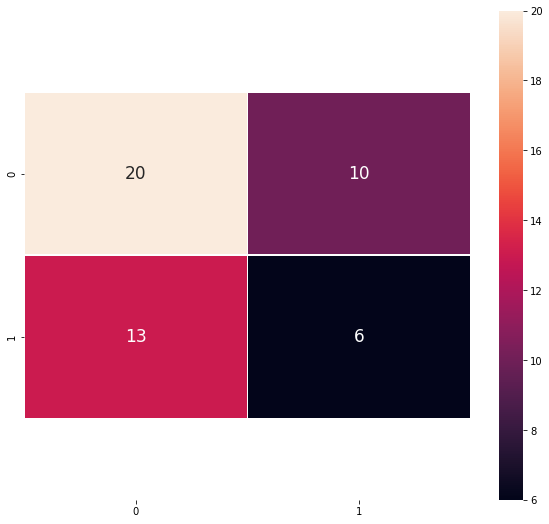

In [16]:
#Représentation des intéractions selon le sexe
plt.figure(figsize=(10,9))
ax = sns.heatmap(np.array(matrix), annot=True, annot_kws={"size": 17}, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [17]:
#Distance moyenne des hommes et des femmes à l'ensemble des noeuds du réseaux 

b=[]
e=[]
for node, data in G.nodes(data=True):
    if data['Sexe'] == 'Homme':
        a=nx.shortest_path_length(G, source=node)
        for v in a.values() :
            b.append(v)
            c=len(b)
            d=sum(b)
    if data['Sexe'] == 'Femme':
        z=nx.shortest_path_length(G, source=node)
        for w in z.values() :
            e.append(w)
            x=len(e)
            y=sum(e)
            
print(d/c)
print((y/x))

2.3125
2.3693181818181817


In [18]:
#Noeud centraux (Indegree/intermédiaire/proximité) / Sexe 

Indegree = nx.in_degree_centrality(Gd)
Betweness = nx.betweenness_centrality(G)
Clossness = nx.closeness_centrality(G)

In=dict((sorted(Indegree.items(), key=lambda x: x[1], reverse=True)))
Be=dict((sorted(Betweness.items(), key=lambda x: x[1], reverse=True)))
Cl=dict((sorted(Clossness.items(), key=lambda x: x[1], reverse=True)))

Dfin=pd.Series(In).to_frame()
Dfbe=pd.Series(Be).to_frame()
Dfcl=pd.Series(Cl).to_frame()
Dfse=pd.Series(result).to_frame()

InF=pd.concat([Dfin, Dfse], axis=1,ignore_index=True)
BeF=pd.concat([Dfbe, Dfse], axis=1,ignore_index=True)
ClF=pd.concat([Dfcl, Dfse], axis=1,ignore_index=True)

print(InF.sort_values(by=[0],ascending=False)[:10])
print(BeF.sort_values(by=[0],ascending=False)[:10])
print(ClF.sort_values(by=[0],ascending=False)[:10])

                      0      1
Wilson Ra      0.161290  Homme
Lucile Gi      0.096774  Femme
Marie Ro       0.096774  Femme
Jing Li        0.096774  Femme
Daphné Ch      0.064516  Femme
Lucile Gi AF   0.064516  Femme
Xi YU AF2      0.064516  Femme
Lucile Gi AF2  0.064516  Femme
Dann Me        0.064516  Homme
Antoine Ho     0.064516  Homme
                       0      1
Lucile Gi       0.653405  Femme
Dann Me         0.344444  Homme
Xi YU           0.313620  Femme
Antoine Ho      0.199283  Homme
Marie Ro        0.007168  Femme
Wilson Ra       0.003943  Homme
Lucile Gi AF22  0.000717  Femme
Mathieu Ma      0.000000  Homme
Lara Eu         0.000000  Femme
Zoé Ja          0.000000  Femme
                       0      1
Lucile Gi       0.673913  Femme
Dann Me         0.596154  Homme
Xi YU           0.584906  Femme
Antoine Ho      0.563636  Homme
Wilson Ra       0.430556  Homme
Lucile Gi AF22  0.424658  Femme
Lucile Gi AF    0.418919  Femme
Lucile Gi AF2   0.418919  Femme
Lucile Gi AH    0.4

In [19]:
#Sous ensemble Hommes/Femmes 
Gh=G.copy() 
Gf=G.copy()

nodesdattH = [x for x,y in Gd.nodes(data=True) if y['Sexe']=="Homme"]
Gf.remove_nodes_from(nodesdattH) 

nodesdattF = [x for x,y in Gd.nodes(data=True) if y['Sexe']=="Femme"]
Gh.remove_nodes_from(nodesdattF) 

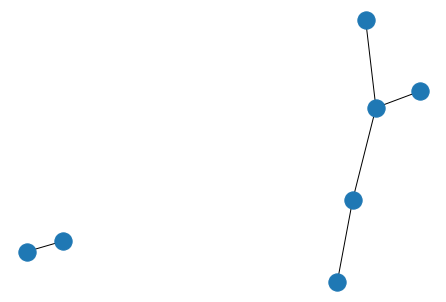

------------------------------------------------------------------------------------------------------------------


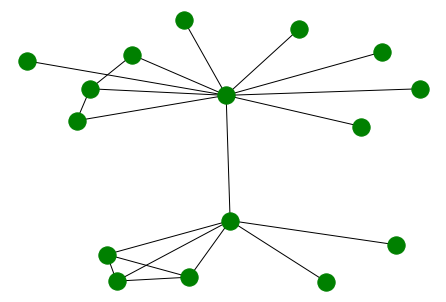

In [20]:
#Visualisation des relation entre hommes et entre femmes 

nx.write_edgelist(Gh, path="grid.edgelist", delimiter=":")
H1 = nx.read_edgelist(path="grid.edgelist", delimiter=":")
nx.draw(H1)
plt.show()
print("------------------------------------------------------------------------------------------------------------------")
nx.write_edgelist(Gf, path="grid.edgelist", delimiter=":")
H2 = nx.read_edgelist(path="grid.edgelist", delimiter=":")
nx.draw(H2,node_color='green')
plt.show()

In [71]:
#Nous pouvons ici réaliser des analyses de pertes 
Gg = sorted(nx.connected_components(G), key=len, reverse=True)
Gm = G.subgraph(Gg[0])
Gg = sorted(nx.connected_components(Gf), key=len, reverse=True)
Gmf = G.subgraph(Gg[0])
Gg = sorted(nx.connected_components(Gh), key=len, reverse=True)
Gmh = G.subgraph(Gg[0])

#Perte de noeuds --> Noeuds deconnectés du reste du réseaux (composant le + important)

print(len(Gmf)-len(Gf))
print(len(Gmh)-len(Gh))

-6
-5


In [109]:
#Perte de liens 
DeH={}
DeF={}

for node, data in G.nodes(data=True):
    if data['Sexe'] == 'Homme':
        i=node
        f=(G.degree[node])
        DeH[i]=f
    if data['Sexe'] == 'Femme':
        i=node
        f=(G.degree[node])
        DeF[i]=f
DeHA={}
DeFA={}
        
for node in Gh.nodes:
    j=node
    k=(Gh.degree[node])
    DeHA[j]=k
for node in Gf.nodes:
    j=node
    k=(Gf.degree[node])
    DeFA[j]=k

nh=pd.Series(DeH).to_frame()
nh1=pd.Series(DeHA).to_frame()

nf=pd.Series(DeF).to_frame()
nf1=pd.Series(DeFA).to_frame()

PlF=pd.concat([nf, nf1], axis=1,ignore_index=True)
PlH=pd.concat([nh, nh1], axis=1,ignore_index=True)

PlF[2]=PlF[0]-PlF[1]
PlH[2]=PlH[0]-PlH[1]

print(PlF.sort_values(by=[0],ascending=False)[:5])
print(PlH.sort_values(by=[0],ascending=False)[:5])

                 0   1  2
Lucile Gi       16  10  6
Xi YU            9   6  3
Lucile Gi AF22   4   3  1
Jing Li          3   3  0
Lucile Gi AF2    3   2  1
                0  1  2
Dann Me        10  2  8
Antoine Ho      7  3  4
Wilson Ra       5  1  4
Antoine Ho AH   2  1  1
Lucile Gi AH    2  1  1


In [130]:
#Nous pouvons également voir les cliques et triades féminines ou masculine  

triangleG = sum(nx.triangles(G).values()) / 3
triangleGH=sum(nx.triangles(Gh).values()) / 3
triangleGF=sum(nx.triangles(Gf).values()) / 3

cliquesg=sum(nx.number_of_cliques(G).values())
Cliquesf=sum(nx.number_of_cliques(Gf).values())
cliquesH=sum(nx.number_of_cliques(Gh).values())

print(triangleGF*100/triangleG) #31% des triades sont féminines 
print(cliquesH*100/cliquesg) #21% des cliques sont masculines 

31.57894736842105
20.967741935483872


In [131]:
#Exportation des données sur Gephi pour plus d'analyse et une visualisation 

nx.write_gexf(G, "graph.gexf")